In [1]:
import pandas as pd
import numpy as np

import os, math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
morancolor=sns.color_palette(['#66260b', '#cb8034', '#ddc08d', '#9c886f', '#47261a','#363634', '#524636', '#ac7330', '#b19a78', '#d1c5ab'])
sns.set_theme(style="whitegrid", palette=morancolor)
plt.rcParams['font.family']='serif'
plt.rcParams['figure.dpi'] =100 # high resolution

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E:/github/suicide/suicide.csv")
df.shape
df.columns=df.columns.str.strip().str.replace(' ','').str.replace('/','_per_').str.replace('-','_')
df.rename(columns={'gdp_for_year($)':'gdp_for_year','gdp_per_capita($)':'gdp_per_capita'},inplace=True)

In [3]:
df.sample(10)

,country,year,sex,age,suicides_no,population,suicides_per_100kpop,country_year,HDIforyear,gdp_for_year,gdp_per_capita,generation
18178,Norway,2011,female,5-14 years,4,299327,1.34,Norway2011,0.941,"498,831,558,926",107430,Generation Z
23345,South Africa,2000,female,55-74 years,4,2005213,0.20,South Africa2000,0.632,"136,361,854,808",3361,Silent
27735,Uzbekistan,2004,female,5-14 years,4,3031913,0.13,Uzbekistan2004,NaN,"12,030,023,548",516,Millenials
22035,Serbia,2003,female,35-54 years,103,1106280,9.31,Serbia2003,NaN,"21,188,704,081",2979,Boomers
10415,Grenada,1988,male,5-14 years,0,12800,0.00,Grenada1988,NaN,"236,357,519",2707,Generation X
13055,Italy,2007,male,25-34 years,354,4114889,8.60,Italy2007,NaN,"2,203,053,380,783",38935,Generation X
10404,Grenada,1985,male,5-14 years,0,11950,0.00,Grenada1985,NaN,"167,728,444",1965,Generation X
2116,Austria,2012,female,55-74 years,99,962372,10.29,Austria2012,0.884,"409,425,234,155",50979,Boomers
3048,Barbados,2002,female,55-74 years,0,21258,0.00,Barbados2002,NaN,"3,169,600,000",12511,Silent
12915,Italy,1995,female,35-54 years,310,7583976,4.09,Italy1995,0.799,"1,170,787,352,906",21625,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               27820 non-null  object 
 1   year                  27820 non-null  int64  
 2   sex                   27820 non-null  object 
 3   age                   27820 non-null  object 
 4   suicides_no           27820 non-null  int64  
 5   population            27820 non-null  int64  
 6   suicides_per_100kpop  27820 non-null  float64
 7   country_year          27820 non-null  object 
 8   HDIforyear            8364 non-null   float64
 9   gdp_for_year          27820 non-null  object 
 10  gdp_per_capita        27820 non-null  int64  
 11  generation            27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.gdp_for_year=df.gdp_for_year.str.replace(',','').astype(float)
df.age=df.age.str.replace(" years","")
df.year=df.year.astype(object)

There are 27820 observations in our sample

In [6]:
df.describe()

,suicides_no,population,suicides_per_100kpop,HDIforyear,gdp_for_year,gdp_per_capita
count,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


In [7]:
df.describe(include='O')

,country,year,sex,age,country_year,generation
count,27820,27820,27820,27820,27820,27820
unique,101,32,2,6,2321,6
top,Iceland,2009,male,35-54,Norway1990,Generation X
freq,382,1068,13910,4642,12,6408


In [8]:
df.nunique()

country                   101
year                       32
sex                         2
age                         6
suicides_no              2084
population              25564
suicides_per_100kpop     5298
country_year             2321
HDIforyear                305
gdp_for_year             2321
gdp_per_capita           2233
generation                  6
dtype: int64

In [9]:
df.isnull().sum().sort_values(ascending=False)

HDIforyear              19456
country                     0
year                        0
sex                         0
age                         0
suicides_no                 0
population                  0
suicides_per_100kpop        0
country_year                0
gdp_for_year                0
gdp_per_capita              0
generation                  0
dtype: int64

In [10]:
a = df.columns
for i in range(0, len(a)):
  print('Name of Column',i+1,':',a[i])

Name of Column 1 : country
Name of Column 2 : year
Name of Column 3 : sex
Name of Column 4 : age
Name of Column 5 : suicides_no
Name of Column 6 : population
Name of Column 7 : suicides_per_100kpop
Name of Column 8 : country_year
Name of Column 9 : HDIforyear
Name of Column 10 : gdp_for_year
Name of Column 11 : gdp_per_capita
Name of Column 12 : generation


In [11]:
df.shape
#27,820rows, 12 columns

(27820, 12)

In [12]:
# All category for the age group

df['age'].unique()

array(['15-24', '35-54', '75+', '25-34', '55-74', '5-14'], dtype=object)

In [13]:
def despine():
    sns.despine(top=1,bottom=1,right=1,left=1)
    
def title(title,fontsize=13):
    plt.title(title,fontweight='bold',fontsize=fontsize)

In [14]:
from scipy.stats import skew
def kdeall(df,lst,h=4,w=15,cut=3,showmeans=False,hspace=.5,wspace=.25,showskew=True):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        if showskew==True: sns.kdeplot(df.dropna(subset=[col])[col],cut=0,label=f'Skewness: {skew(df.dropna(subset=[col])[col]):.2f}')
        else: sns.kdeplot(df.dropna(subset=[col])[col],cut=0)
        sns.rugplot(df.dropna(subset=[col])[col])
        if showmeans==True:
            plt.axvline(df[col].median(),label='median')
            plt.axvline(df[col].mean(),label='mean',ls='--')
        if (showmeans==True or showskew==True): plt.legend()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold')
        despine()

In [15]:
def barall(df,lst,target,h=4,w=15,cut=3,hspace=.5,wspace=.25):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.barplot(data=df,x=col,y=target)
        plt.xlabel(col,fontweight='bold')
        plt.ylabel('')
        despine()

In [16]:
def pointall(df,lst,target,h=4,w=15,cut=3,hspace=.5,wspace=.25,rotatelst=[],rotation=90):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.pointplot(data=df,x=col,y=target)
        plt.xlabel(col,fontweight='bold')
        plt.ylabel('')
        if col in rotatelst:
            plt.xticks(rotation=rotation)
        despine()

In [17]:
def boxall(df,lst,h=4,w=15,cut=3,hspace=.5,wspace=.25,showmeans=True):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.boxplot(df[col], showmeans=showmeans)
        plt.xlabel(col,fontweight='bold')
        plt.ylabel('')
        despine()

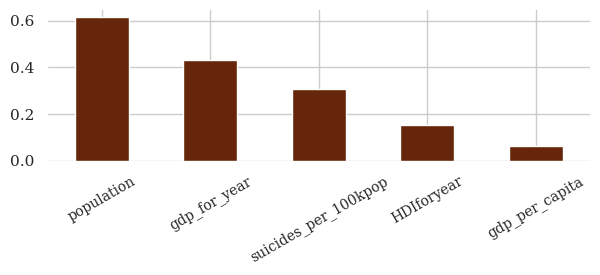

In [18]:
df.corr().suicides_no.abs().sort_values(ascending=False)[1:].plot(kind='bar',figsize=(7,2))
plt.xticks(rotation=30,fontsize=10)
despine()

Univariate analysis

In [19]:
df.describe()[['suicides_no','suicides_per_100kpop']]

,suicides_no,suicides_per_100kpop
count,27820.000000,27820.000000
mean,242.574407,12.816097
std,902.047917,18.961511
min,0.000000,0.000000
25%,3.000000,0.920000
50%,25.000000,5.990000
75%,131.000000,16.620000
max,22338.000000,224.970000


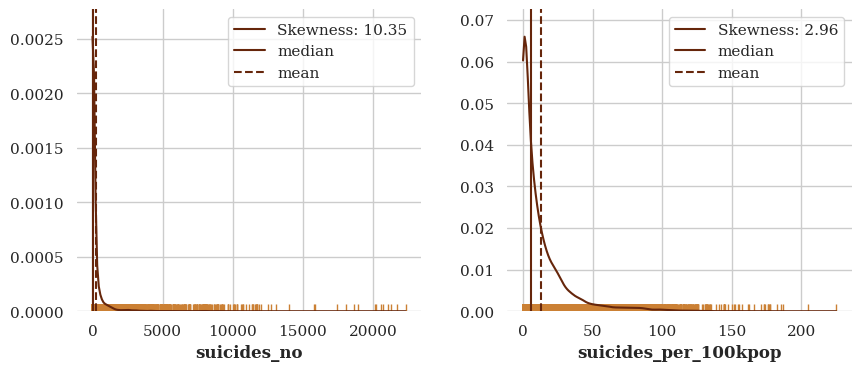

In [20]:
kdeall(df,["suicides_no","suicides_per_100kpop"],cut=2,h=4,w=10,showmeans=True)

    The distribution of suicides_no is right-skewed with some extremmely large values to the right
    The mean and median values of suicides_no are 242 and 25, respectively while the mode value is 0

Categorical features: Age, Sex, Genration, Year, and Country

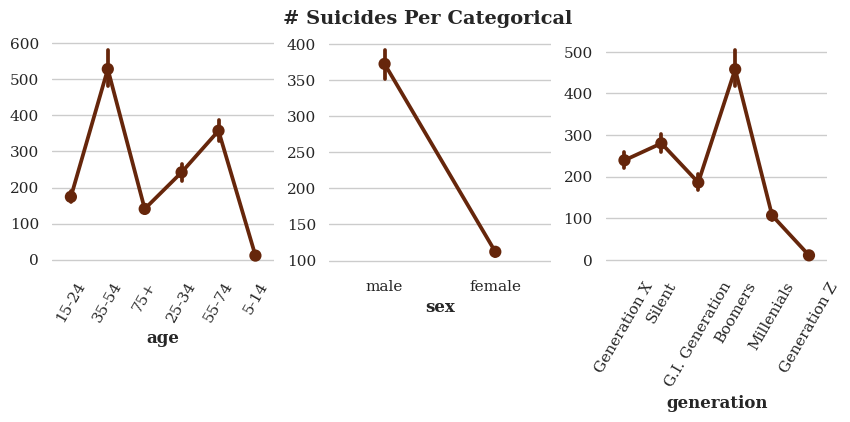

In [21]:
pointall(df,target='suicides_no',lst=['age', 'sex','generation'],cut=3,h=3,w=10,
         rotatelst=['generation','age'],rotation=60)
plt.suptitle('# Suicides Per Categorical',fontsize=14,fontweight='bold')
plt.show()

    Sex: Men three times more higher than women to commit suicide
    Age, generation: Middle-aged and older people have a higher risk of suicide, children (under 15 years old) have the lowest average suicide rate
    Boomers is the highest number of suicides

Year

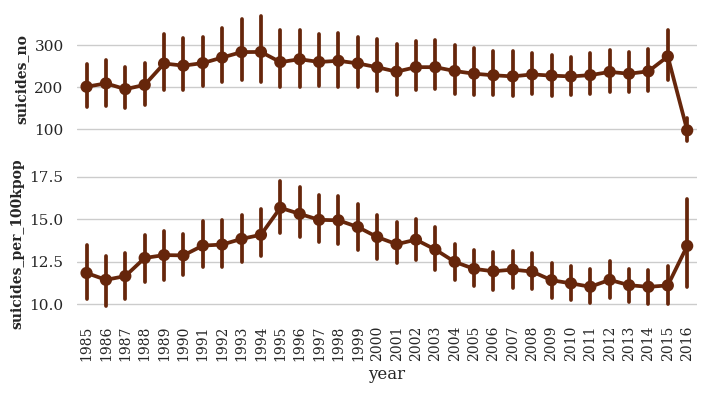

In [22]:
f,ax=plt.subplots(2,1,figsize=(8,4))
for i,col in enumerate(["suicides_no","suicides_per_100kpop"]):
    sns.pointplot(df.year,df[col],ax=ax[i])
    ax[i].tick_params(axis='x', rotation=90, labelsize=10)
    ax[i].set_ylabel(col,fontweight='bold',fontsize=10)
    despine()
ax[0].set(xlabel='',xticklabels='')
plt.show()

    The number of suicides increased significantly in 1990, then fluctuated before plummeting in 2016
    Although total cases of suicides drop in 2016, but the # of suicides per 100k residents in that year increased significant, probably due to the population

Country

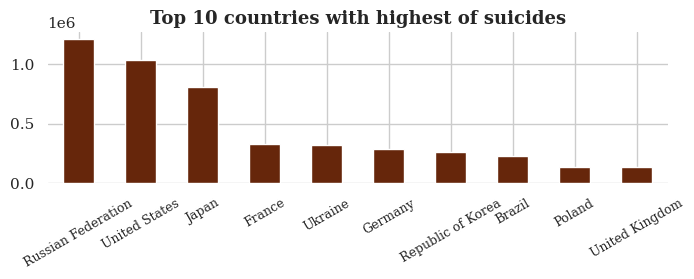

In [23]:
df.groupby('country').sum().suicides_no.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(8,2))
plt.xticks(rotation=30,fontsize=9)
plt.xlabel('')
title('Top 10 countries with highest of suicides')
despine()

Russia, USA and Japan have the highest number of suicides

In [24]:
# Top 10 Countries report Suicides

df[['country' , 'suicides_no']].groupby(['country']).agg('sum').sort_values('suicides_no' , ascending = False).head(10).style.background_gradient('Wistia')

,suicides_no
country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950
Germany,291262
Republic of Korea,261730
Brazil,226613
Poland,139098


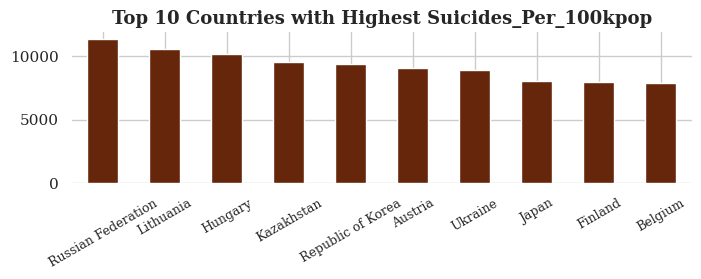

In [25]:
df.groupby('country').sum().suicides_per_100kpop.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(8,2))
title('Top 10 Countries with Highest Suicides_Per_100kpop')
plt.xlabel("")
plt.xticks(rotation=30,fontsize=9)
despine()

The number of suicides per 10,000 inhabitants, the top 5 countries are Russia, Lithuania, Hungary, Kazakhstan and Republic of Korea

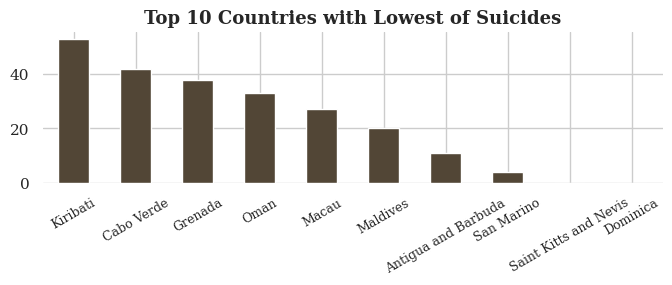

In [26]:
df.groupby('country').sum().suicides_no.sort_values(ascending=False).tail(10).plot(kind='bar',figsize=(8,2),color="#524636")
plt.xticks(rotation=30,fontsize=9)
plt.xlabel('')
title('Top 10 Countries with Lowest of Suicides')
despine()

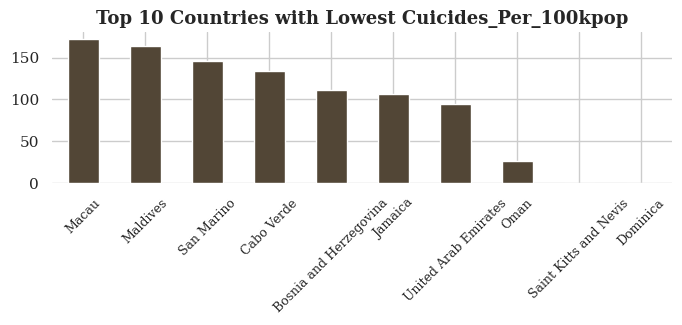

In [27]:
df.groupby('country').sum().suicides_per_100kpop.sort_values(ascending=False).tail(10).plot(kind='bar',figsize=(8,2),color="#524636")
title('Top 10 Countries with Lowest Cuicides_Per_100kpop')
plt.xlabel("")
plt.xticks(rotation=45,fontsize=9)
despine()

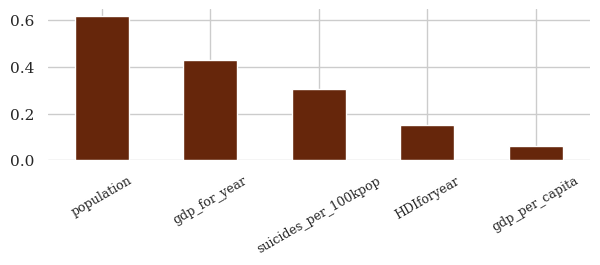

In [28]:
# correlation between of suicides and other numerical features
df.corr().suicides_no.abs().sort_values(ascending=False)[1:].plot(kind='bar',figsize=(7,2))
plt.xticks(rotation=30,fontsize=9)
despine()

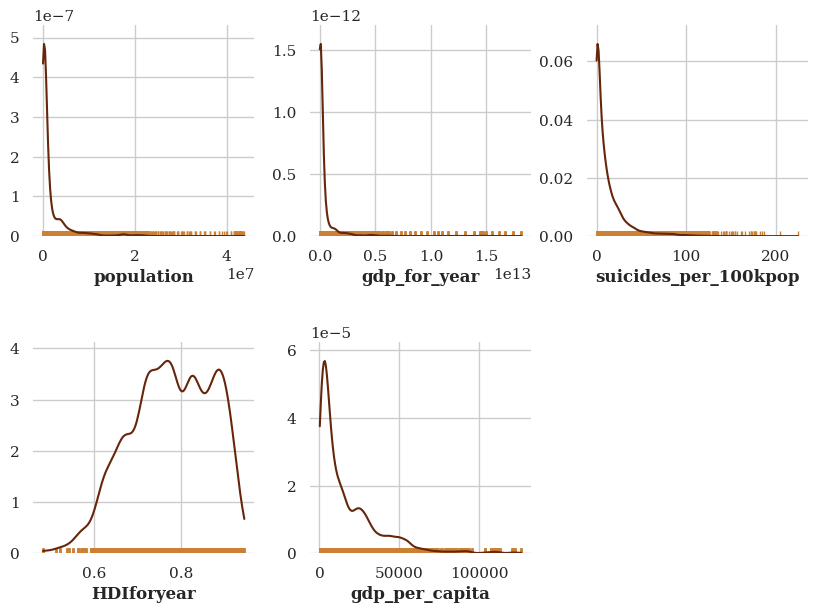

In [29]:
numcol=df.corr().suicides_no.abs().sort_values(ascending=False)[1:].index.tolist()
kdeall(df,numcol,h=7,w=10,showskew=False)
plt.show()

Most of our numerical features have a positive skewness, except HDIforyear

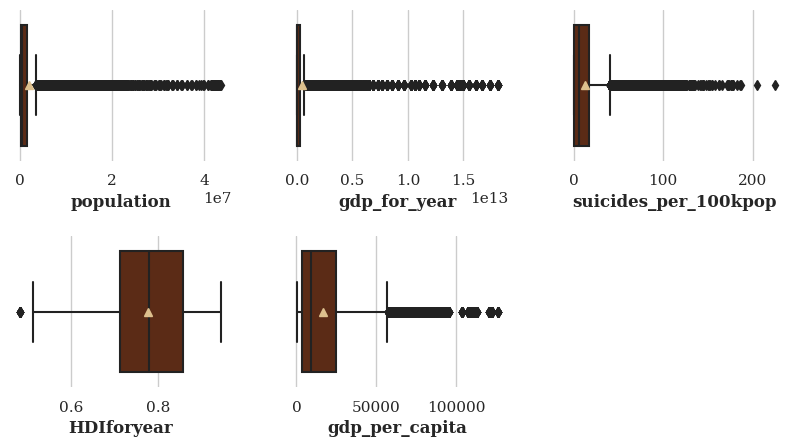

In [30]:
boxall(df,numcol,cut=3,h=5,w=10)

Outliers appear in most of our numerical features, especically in population and gdp_for_year

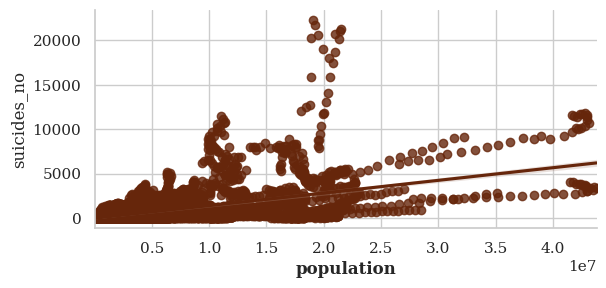

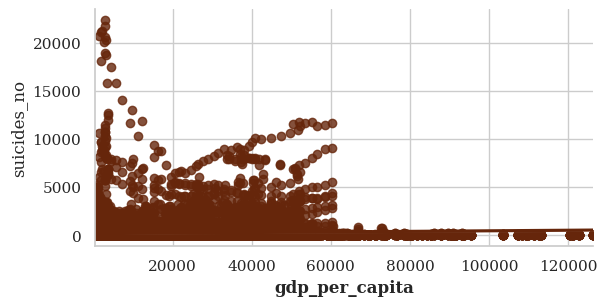

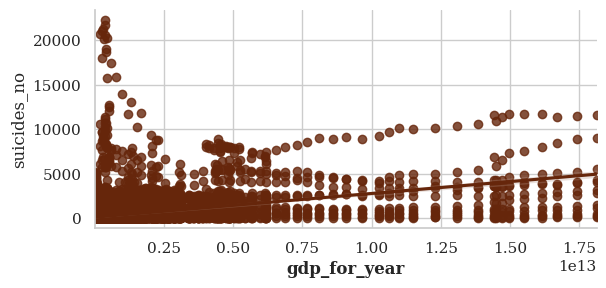

In [31]:
for i in ['population','gdp_per_capita','gdp_for_year']:
    sns.lmplot(data=df,x=i,y="suicides_no",height=3,aspect=2)
    plt.xlabel(i,fontweight='bold')

Correlation matrix

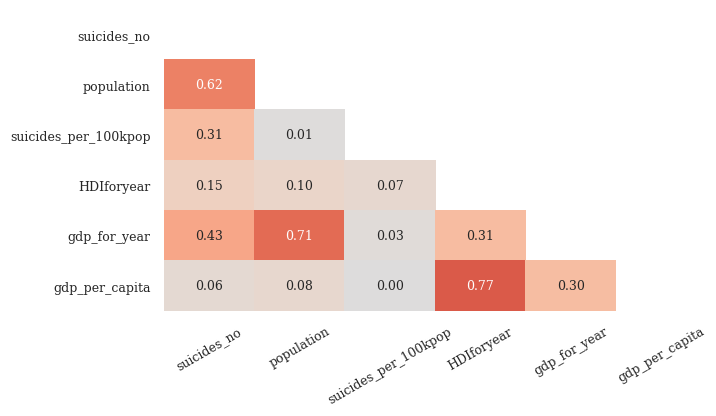

In [32]:
plt.figure(figsize=(7,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":9},cmap='coolwarm',fmt='.2f',mask=mask,vmax=1,vmin=-1,cbar=False)
plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)
plt.show()

    Features having a significant impact on suicides_no (in order) are: population, gdp for year, and suicides per 100kpop
    Some features are significantly correlated, such as gdp for year and population (0.71), and gdp per capita and HDI for year (0.77)

Sex and Generation

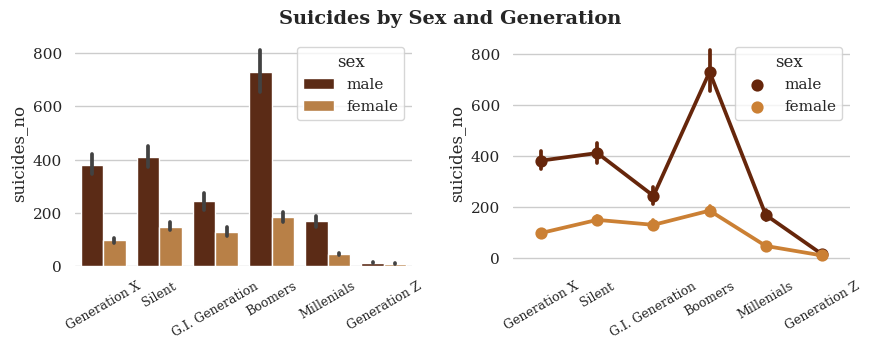

In [33]:
f,ax=plt.subplots(1,2,figsize=(10,3))
plt.subplots_adjust(wspace=.3,hspace=.5)
sns.barplot(df.generation,df.suicides_no,hue=df.sex,ax=ax[0])
sns.pointplot(df.generation, df.suicides_no, hue=df.sex,ax=ax[1])
for i in [0,1]:
    ax[i].tick_params(axis='x', rotation=30, labelsize=9)
    ax[i].set_xlabel('')
plt.suptitle('Suicides by Sex and Generation',fontsize=14,fontweight='bold')
despine()

Sex and Age

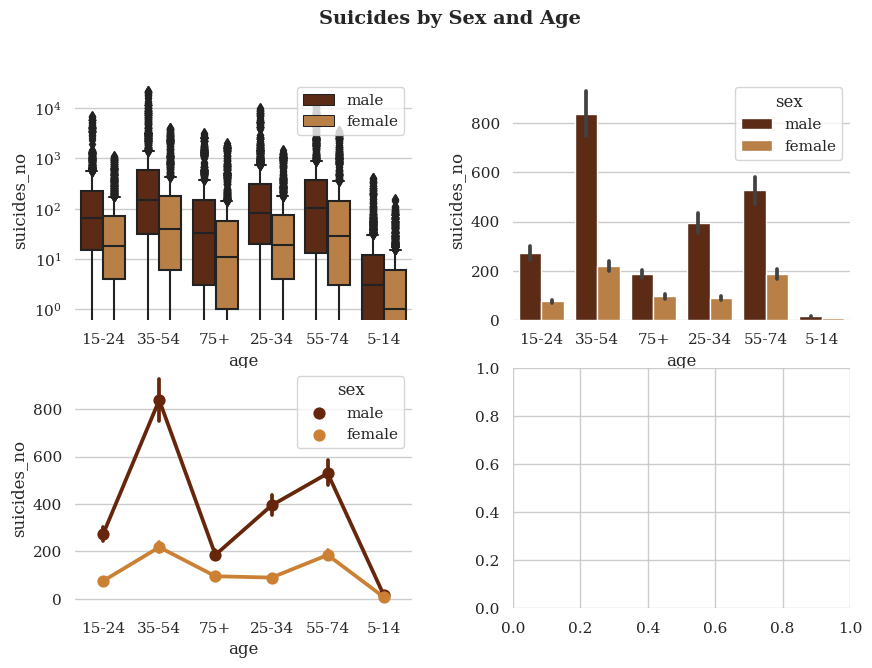

In [34]:
f,ax=plt.subplots(2,2,figsize=(10,7))
plt.subplots_adjust(wspace=.3)
sns.boxplot(data=df,x="age",y="suicides_no",hue="sex",ax=ax[0,0])
ax[0,0].set_yscale('log') # we use log because of large distribution of suicides_no
ax[0,0].legend(loc=1)
sns.barplot(df.age,df.suicides_no,hue=df.sex,ax=ax[0,1])
sns.pointplot(df.age, df.suicides_no, hue=df.sex,ax=ax[1,0])
plt.suptitle('Suicides by Sex and Age',fontsize=14,fontweight='bold')
despine()

Men are more likely to commit suicide than women, especially in the middle and old age groups
There are no clear linear trend line between age, sex, and # of suicides

Country and Sex

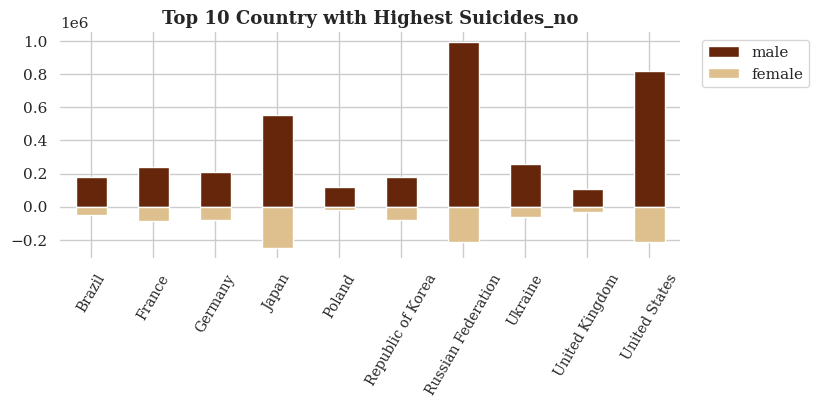

In [35]:
topsucide=df.groupby('country').sum().suicides_no.sort_values(ascending=False).head(10).index.tolist()
dftopsucide=df[df.country.apply(lambda x: x in topsucide)]

plt.figure(figsize=(8,3))
dftopsucide.groupby(['country','sex']).sum().suicides_no.unstack().male.plot(kind='bar')
(dftopsucide.groupby(['country','sex']).sum().suicides_no.unstack().female*(-1)).plot(kind='bar',color='#ddc08d')
plt.legend(bbox_to_anchor=(1.22,1))
title('Top 10 Country with Highest Suicides_no',fontsize=13)
plt.xticks(rotation=60,fontsize=10)
plt.xlabel("")
despine()

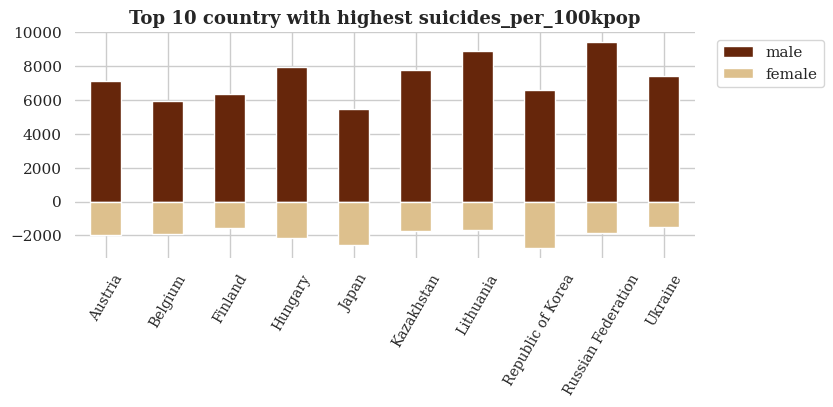

In [36]:
topsucide_pop=df.groupby('country').sum().suicides_per_100kpop.sort_values(ascending=False).head(10).index.tolist()
dftopsucide_perpop=df[df.country.apply(lambda x: x in topsucide_pop)]

plt.figure(figsize=(8,3))
dftopsucide_perpop.groupby(['country','sex']).sum().suicides_per_100kpop.unstack().male.plot(kind='bar')
(dftopsucide_perpop.groupby(['country','sex']).sum().suicides_per_100kpop.unstack().female*(-1)).plot(kind='bar',color='#ddc08d')
plt.legend(bbox_to_anchor=(1.22,1))
title('Top 10 country with highest suicides_per_100kpop')
plt.xticks(rotation=60,fontsize=10)
plt.xlabel("")
despine()

In [37]:
df[['country','suicides_no']].groupby(['country']).agg('sum').sort_values(by='suicides_no').head(15).style.background_gradient(cmap='GnBu')
#The least amount of suicide cases sorted by country (Dominica, Saint Kitts and Nevis, San Marino are among the countries with very low s.r.)

,suicides_no
country,
Dominica,0
Saint Kitts and Nevis,0
San Marino,4
Antigua and Barbuda,11
Maldives,20
Macau,27
Oman,33
Grenada,38
Cabo Verde,42


In [38]:
df[['suicides_no','country']].groupby(['country']).agg('sum').sort_values(by='suicides_no',ascending=False).head(15).style.background_gradient(cmap='cividis')
#The highest countries like Russian Federation, United States, and Japan have notoriously high suicide rates among population (overall stats)

,suicides_no
country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950
Germany,291262
Republic of Korea,261730
Brazil,226613
Poland,139098


Sex and Year

In [39]:
# which year have the highest no. of suicides

df[['suicides_no',
      'year']].groupby(['year']).agg('sum').sort_values(by = 'suicides_no',
                                                        ascending = False).head(10).style.background_gradient(cmap = 'PuBu')

,suicides_no
year,
1999,256119
2002,256095
2003,256079
2000,255832
2001,250652
1998,249591
1996,246725
1995,243544
2009,243487


In [40]:
df[['suicides_no','year']].groupby(['year']).agg('sum').head(15).sort_values(by='suicides_no',ascending=False).style.background_gradient(cmap = 'spring')
#The highest suicide cases sorted by max value

,suicides_no
year,
1999,256119
1998,249591
1996,246725
1995,243544
1997,240745
1994,232063
1993,221565
1992,211473
1991,198020


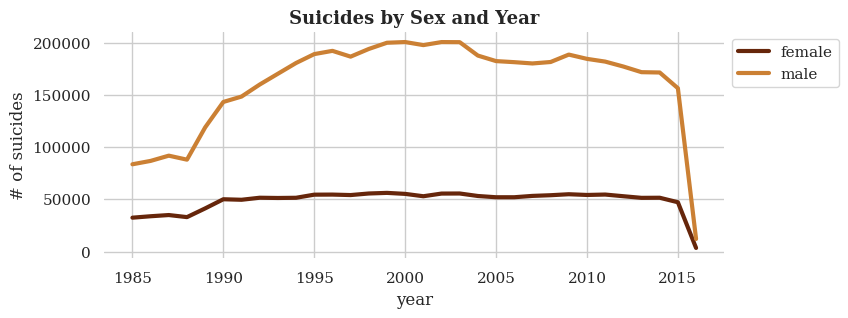

In [41]:
sub=df.groupby(['year','sex']).sum().suicides_no.unstack().reset_index()
plt.figure(figsize=(8,3))
for i in ['female','male']:
    sns.lineplot(data=sub,x='year',y=i,label=i,lw=3)
plt.ylabel('# of suicides')
plt.legend(bbox_to_anchor=(1,1))
title('Suicides by Sex and Year')
despine()

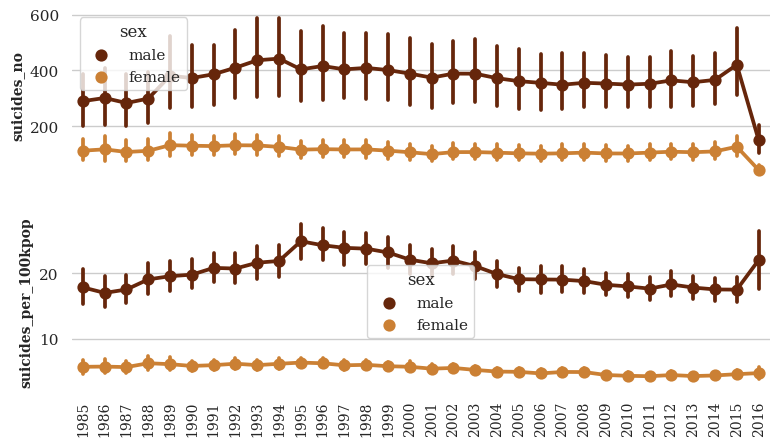

In [42]:
f,ax=plt.subplots(2,1,figsize=(9,5))
for i,col in enumerate(['suicides_no','suicides_per_100kpop']):
    sns.pointplot(df.year,df[col],hue=df.sex,ax=ax[i])
    ax[i].tick_params(axis='x', rotation=90, labelsize=10)
    ax[i].set(xlabel='')
    ax[i].set_ylabel(col,fontsize=10,fontweight='bold')
ax[0].set(xlabel='',xticklabels='')
despine()

    The number of suicides among men fluctuates more than that of women
    The number of suicides per 10,000 residents was less volatile than the total number of suicides, possibly because it normalized the effect of the population

Age, Generation and Year

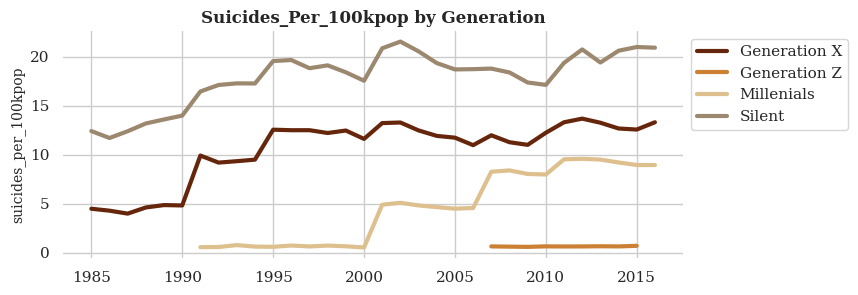

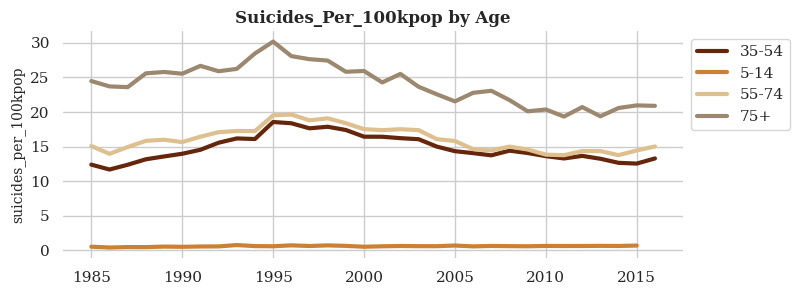

In [43]:
for i in ['generation','age']:
    sub=df.groupby(['year',i]).mean().suicides_per_100kpop.unstack()
    sub.iloc[:,2:].plot(figsize=(8,3),lw=3)
    plt.xlabel('')
    title(f'Suicides_Per_100kpop by {i.capitalize()}',fontsize=12)
    plt.ylabel('suicides_per_100kpop',fontsize=10)
    plt.legend(bbox_to_anchor=(1,1))
    despine()

Categorical features encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['sex','age','generation']:
    df[i]=le.fit_transform(df[i])

In [45]:
suicide=df.drop(columns=["HDIforyear","suicides_per_100kpop"])
loglst=[suicide.gdp_for_year, suicide.population, suicide.suicides_no]
for i in loglst:
    i=np.log10(i)

In [46]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  object 
 2   sex             27820 non-null  int32  
 3   age             27820 non-null  int32  
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   country_year    27820 non-null  object 
 7   gdp_for_year    27820 non-null  float64
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  int32  
dtypes: float64(1), int32(3), int64(3), object(3)
memory usage: 1.8+ MB


Outliers detection

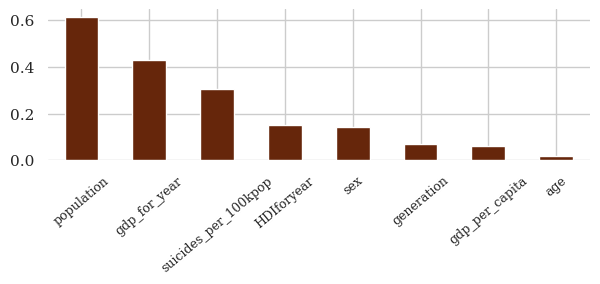

In [47]:
df.corr().suicides_no.abs().sort_values(ascending=False)[1:].plot(kind="bar",figsize=(7,2))
plt.xticks(fontsize=9,rotation=40)
despine()

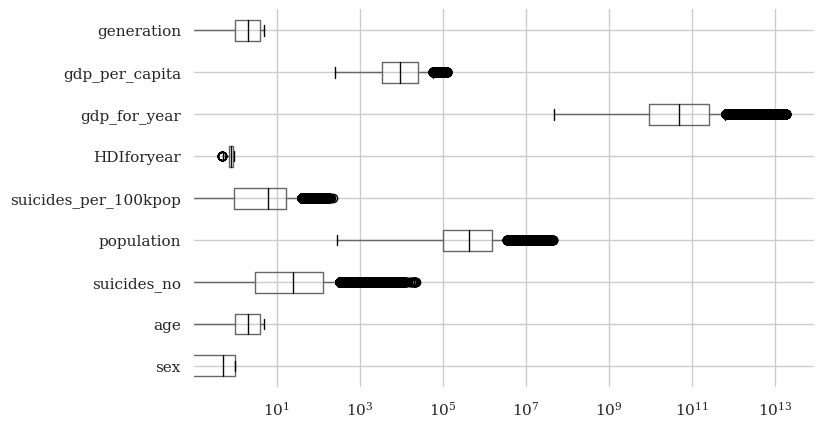

In [48]:
df.boxplot(vert=0,figsize=(8,5))
plt.xscale('log')
despine()

In [49]:
def outlier(df,lst,fence=1.5):
    outlier_index=[]
    for col in lst:
        q1,q3=np.percentile(df[col],25), np.percentile(df[col],75)
        iqr=q3-q1
        outlier_index.extend(df[(df[col]<q1-fence*iqr)|(df[col]>q3+fence*iqr)].index)
    return list(set(outlier_index))

In [50]:
out_ind=outlier(df,['population','gdp_for_year','gdp_per_capita'],fence=3)
print(f"We are going to drop {len(out_ind)} outliers")

We are going to drop 4044 outliers


In [51]:
suicide=suicide.drop(index=out_ind)

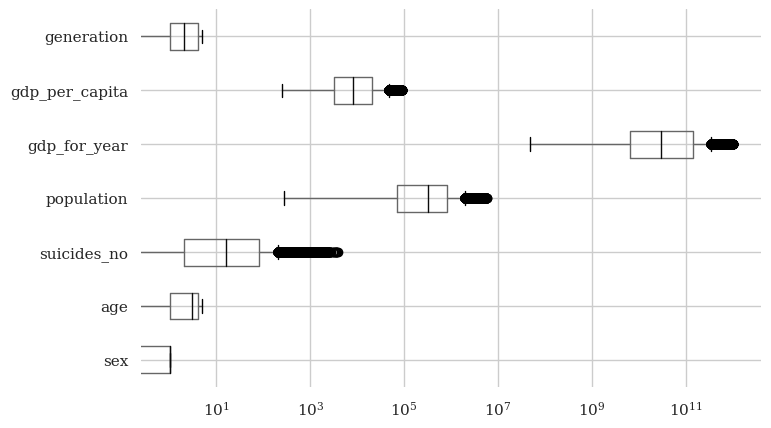

In [52]:
suicide.boxplot(vert=0,figsize=(8,5))
plt.xscale('log')
despine()

Scaling and Normalization

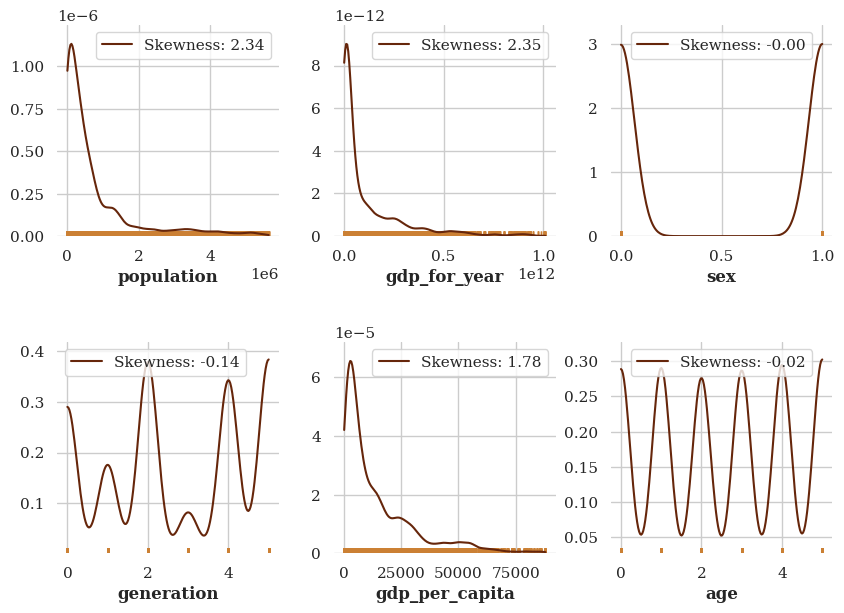

In [53]:
lst=suicide.corr().suicides_no.abs().sort_values(ascending=False)[1:].index.tolist()
kdeall(suicide,lst,h=7,w=10)

In [54]:
sclst=['population','gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
for i in sclst: suicide[i]=sc.fit_transform(suicide[i].values.reshape(-1,1)).reshape(1,-1)[0]

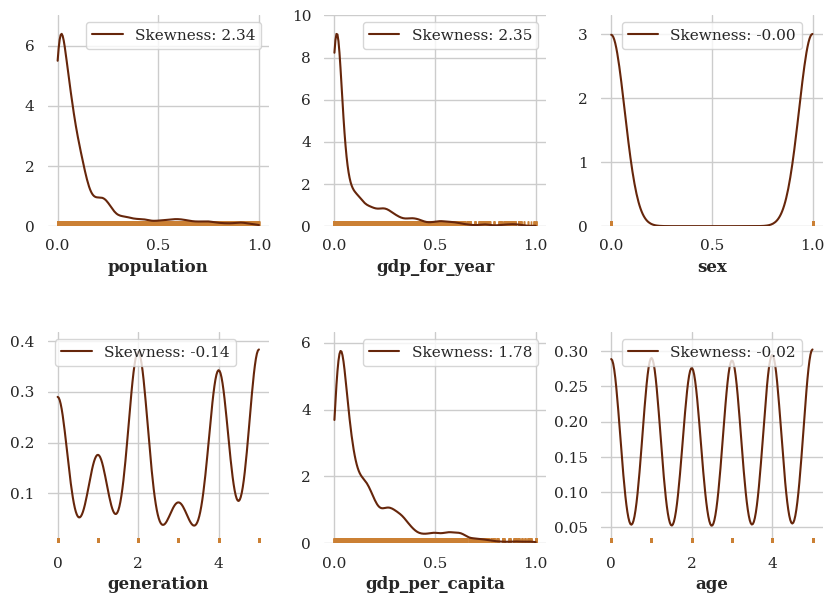

In [55]:
kdeall(suicide,lst,h=7,w=10)

Modeling

In [56]:
sub=suicide.corr().suicides_no.abs().sort_values(ascending=False)[1:]
fullset=sub.index.tolist()
combo1=sub[sub>=.2].index.tolist()

In [57]:
X=suicide.drop('suicides_no',axis=1)
y=suicide.suicides_no
X.shape,y.shape

((23776, 9), (23776,))

Fullset performing

In [58]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(X[fullset], y, test_size=.2, random_state=0)
Xtrain.shape,Xval.shape

((19020, 6), (4756, 6))

LGBMRegressor

In [59]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(learning_rate=.005,n_estimators=1000)
lgbm.fit(Xtrain,ytrain, early_stopping_rounds=5, eval_set=[(Xval,yval)],verbose=False)
print(f"train score: {lgbm.score(Xtrain,ytrain):.4f}")
print(f"test score: {lgbm.score(Xval,yval):.4f}")

train score: 0.8333
test score: 0.7875


RandomForest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf.fit(Xtrain,ytrain)
print(f"train score: {rf.score(Xtrain,ytrain):.4f}")
print(f"test score: {rf.score(Xval,yval):.4f}")

train score: 0.9753
test score: 0.8607


AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(random_state=42, n_estimators=500, learning_rate=.005)
ada.fit(Xtrain,ytrain)
print(f"train score: {ada.score(Xtrain,ytrain):.4f}")
print(f"test score: {ada.score(Xval,yval):.4f}")

train score: 0.4708
test score: 0.4767


Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
print(f"train score: {lr.score(Xtrain,ytrain):.4f}")
print(f"test score: {lr.score(Xval,yval):.4f}")

train score: 0.3270
test score: 0.3171


Performing on subset

In [63]:
Xtrain1,Xval1,ytrain1,yval1=train_test_split(X[combo1], y, test_size=.2, random_state=0)
Xtrain1.shape,Xval1.shape

((19020, 3), (4756, 3))

LGBMRegressor

In [64]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(learning_rate=.005,n_estimators=1000)
lgbm.fit(Xtrain1,ytrain1, early_stopping_rounds=5, eval_set=[(Xval1,yval1)],verbose=False)
print(f"train score: {lgbm.score(Xtrain1,ytrain1):.4f}")
print(f"test score: {lgbm.score(Xval1,yval1):.4f}")

train score: 0.5216
test score: 0.4252


RandomForest

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf.fit(Xtrain1,ytrain1)
print(f"train score: {rf.score(Xtrain1,ytrain1):.4f}")
print(f"test score: {rf.score(Xval1,yval1):.4f}")

train score: 0.9258
test score: 0.3545


Conclusion:

    Our models show better performance on fullset
    RandomForestRegressor and LGBMRegressor have better performance among our models
    
    RandomForest : 
    
    train score: 0.9753
    test score: 0.8607
    
    LGBMRegressor :
    
    train score: 0.8333
    test score: 0.7875